In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("./input/train.csv")

In [3]:
df_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
df_test = pd.read_csv("./input/test.csv")

In [5]:
df_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [6]:
df_data_dict = pd.read_excel("./input/Data_Dictionary.xlsx")

In [7]:
df_data_dict

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


In [8]:
df_merch = pd.read_csv("./input/merchants.csv")

In [9]:
df_merch.head().transpose()

,0,1,2,3,4
merchant_id,M_ID_838061e48c,M_ID_9339d880ad,M_ID_e726bbae1e,M_ID_a70e9c5f81,M_ID_64456c37ce
merchant_group_id,8353,3184,447,5026,2228
merchant_category_id,792,840,690,792,222
subsector_id,9,20,1,9,21
numerical_1,-0.0574706,-0.0574706,-0.0574706,-0.0574706,-0.0574706
numerical_2,-0.0574706,-0.0574706,-0.0574706,-0.0574706,-0.0574706
category_1,N,N,N,Y,Y
most_recent_sales_range,E,E,E,E,E
most_recent_purchases_range,E,E,E,E,E
avg_sales_lag3,-0.4,-0.72,-82.13,NaN,NaN


In [10]:
df_hist_trans = pd.read_csv("./input/historical_transactions.csv")

In [11]:
df_hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [12]:
df_new_merch_trans = pd.read_csv("./input/new_merchant_transactions.csv")

In [13]:
df_new_merch_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [14]:
len(df_new_merch_trans)

1963031

In [15]:
len(df_hist_trans)

29112361

In [16]:
df_trans = pd.concat([df_hist_trans, df_new_merch_trans])

In [17]:
len(df_trans)

31075392

In [18]:
df_train_merg = df_train.merge(df_hist_trans, how='inner', on="card_id")

In [19]:
len(df_train)

201917

In [20]:
len(df_train_merg)

18030009

In [21]:
df_train_merg.head()
# Month_lag is the difference in months between purchase date month and reference date month, I'm assuming reference month is feb 2018.

,first_active_month,card_id,feature_1,feature_2,feature_3,target,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,195,M_ID_cc72dac895,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34
1,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,278,M_ID_c9c0f1cb3f,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37
2,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,683,M_ID_36f9e41993,-6,-0.726171,2017-08-10 21:01:16,1.0,9,34
3,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,309,M_ID_b790230ee9,-2,-0.610167,2017-12-15 12:06:58,1.0,9,21
4,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,278,M_ID_ab67f6c982,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37


In [22]:
df_train_merg["month_lag"].value_counts()

-2     2389787
-1     2248468
 0     2151419
-3     1920958
-4     1635925
-5     1466671
-6     1271559
-7     1098685
-8      882416
-9      761224
-10     668862
-11     620200
-12     488207
-13     425628
Name: month_lag, dtype: int64

<BarContainer object of 14 artists>

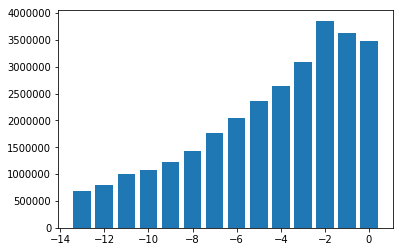

In [23]:
plt.bar(x=df_hist_trans["month_lag"].value_counts().index, height=df_hist_trans["month_lag"].value_counts())

<BarContainer object of 14 artists>

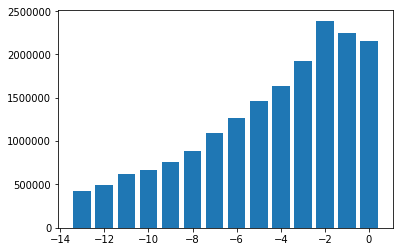

In [24]:
plt.bar(x=df_train_merg["month_lag"].value_counts().index, height=df_train_merg["month_lag"].value_counts())
# month lag 1, 2 are from new transaction 

(array([1.8030008e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([-7.46907800e-01,  6.01059725e+05,  1.20212020e+06,  1.80318067e+06,
         2.40424114e+06,  3.00530161e+06,  3.60636208e+06,  4.20742256e+06,
         4.80848303e+06,  5.40954350e+06,  6.01060397e+06]),
 <a list of 10 Patch objects>)

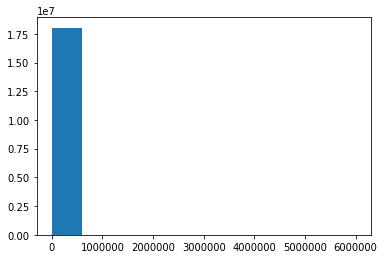

In [25]:
plt.hist(df_train_merg["purchase_amount"])

Text(0.5, 0, 'Target')

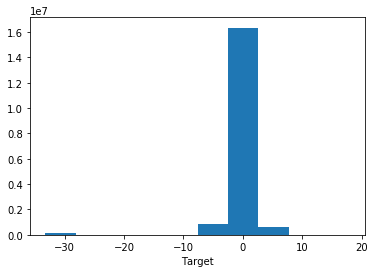

In [26]:
plt.hist(df_train_merg['target'])
plt.xlabel("Target")

(-2, 3)

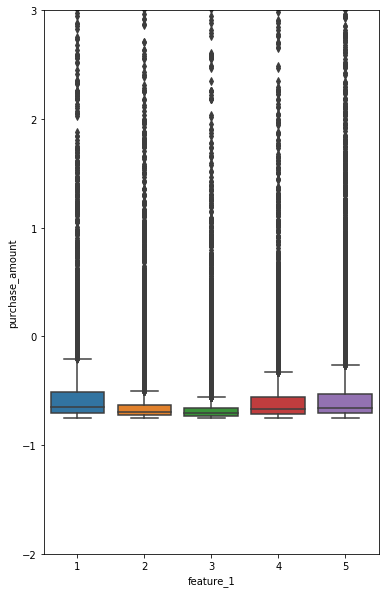

In [27]:
plt.figure(figsize=(6,10))
sns.boxplot(x='feature_1', y= "purchase_amount", data=df_train_merg.iloc[0:100000])
plt.ylim(-2, 3)

In [28]:
df_train_merg['installments'].unique()

array([  0,   1,   3,   5,   4,   6,   2,  -1,  10,   7,  12,   8,   9,
        11, 999])

In [29]:
a = df_train_merg['installments'].mean()
df_train_merg.loc[(df_train_merg['installments']==-1),'installments'] = a
# -1 is missing value
df_train_merg.loc[(df_train_merg['installments']==999),'installments'] = a
# 999 is missing value

In [30]:
df_train_merg['installments'].unique()

array([ 0.        ,  1.        ,  3.        ,  5.        ,  4.        ,
        6.        ,  2.        ,  0.64790406, 10.        ,  7.        ,
       12.        ,  8.        ,  9.        , 11.        ])

In [31]:
len(df_train_merg['installments'].unique())

14

In [32]:
df_train_mean = df_train_merg.groupby(by="card_id", sort=False).mean()

In [33]:
len(df_train_mean)

201917

In [34]:
len(df_train)

201917

In [35]:
df_train_mean.reset_index(inplace=True)

In [36]:
df_train_mean.tail()

,card_id,feature_1,feature_2,feature_3,target,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
201912,C_ID_963962de2c,3.0,2.0,1.0,-2.740821,87.500000,0.021739,654.586957,-2.065217,-0.709244,2.391304,7.608696,26.565217
201913,C_ID_1314773c0b,3.0,1.0,1.0,0.312917,89.255319,0.021277,365.787234,-3.872340,-0.711339,1.000000,15.000000,29.191489
201914,C_ID_7666735b3d,4.0,3.0,0.0,0.093494,205.528736,1.260321,447.735632,-3.735632,-0.381465,2.859155,6.448276,24.528736
201915,C_ID_73f5a0efd0,3.0,2.0,1.0,-4.676589,77.230769,0.000000,606.461538,-3.346154,-0.688037,1.000000,9.000000,20.461538
201916,C_ID_92c9984c58,3.0,1.0,1.0,-1.859413,9.089552,1.161552,666.097015,-5.082090,-0.619683,2.478261,0.462687,22.529851


In [37]:
df_train[["ave_installments", "ave_month_lag", "ave_purchase_amount"]] = df_train_mean[["installments", "month_lag", "purchase_amount"]] 

In [38]:
df_train.tail()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,ave_installments,ave_month_lag,ave_purchase_amount
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740821,0.021739,-2.065217,-0.709244
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312917,0.021277,-3.872340,-0.711339
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093494,1.260321,-3.735632,-0.381465
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.676589,0.000000,-3.346154,-0.688037
201916,2017-07,C_ID_92c9984c58,3,1,1,-1.859413,1.161552,-5.082090,-0.619683


In [39]:
df_train_merg.loc[:, "for_count"] = 1

In [40]:
df_train_merg.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,for_count
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0.0,A,195,M_ID_cc72dac895,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34,1
1,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0.0,A,278,M_ID_c9c0f1cb3f,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37,1


In [41]:
df_train_sum = df_train_merg.groupby(by="card_id", sort=False).sum()

In [42]:
df_train_sum.reset_index(inplace=True)

In [43]:
df_train_sum.head(2)

,card_id,feature_1,feature_2,feature_3,target,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,for_count
0,C_ID_92a2005557,1300,520,260,-213.273476,19572,4.000000,112206,-1017,-165.968739,272.0,2343,8181,260
1,C_ID_3d0044924f,1400,350,0,137.519638,24599,546.295808,144595,-1761,-210.006336,319.0,2900,9460,350


In [44]:
df_train[["total_purchase_amount", "total_purchase_numbers"]] = df_train_sum[["purchase_amount","for_count"]]

In [46]:
df_train.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,0.015385,-3.911538,-0.638341,-165.968739,260
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,1.560845,-5.031429,-0.600018,-210.006336,350


In [48]:
df_train_merg['merchant_category_id'].unique()

array([195, 278, 683, 309, 560,  80, 130, 454, 637, 526, 108, 884, 561,
       478, 879, 705, 369, 367, 360,  45, 823, 792, 528, 333, 469, 842,
       763, 813, 171, 210,  87, 307, 387, 225, 179,  33, 779, 834, 420,
       606, 818,  68, 839, 793, 650, 178, 703, 437, 302, 651, 340, 222,
       574, 527, 690,  90, 422, 702, 889, 511, 383, 419, 385, 771, 557,
       206, 554, 434, 317, 273, 181, 292, 111, 386, 518, 427, 665, 506,
       656, 480, 400, 550, 289, 172, 299, 241, 489,  19, 623,  60, 531,
       544, 642, 607, 443,   2, 836, 840, 755, 184, 414, 248,  63, 412,
       783, 806, 363, 416, 274, 298, 507, 734, 829, 713, 795, 891, 415,
       398, 748, 432, 180, 217, 491, 409, 356, 529,  14, 706, 661, 126,
       373, 411, 667, 166, 216, 509, 332, 342,  40,  69, 737, 534, 774,
       769, 605, 685, 215,  36, 451, 357, 751, 630, 497, 348, 462, 391,
       110,  81, 670, 614,  56, 613, 472,  34, 430, 259, 514, 580, 761,
        -1, 154, 536, 843, 343, 115, 105, 198, 458, 645, 669, 22

In [49]:
df_merch_cat_id = df_train_merg.groupby('card_id', sort=False)['merchant_category_id'].apply(list)

In [50]:
df_merch_cat_id.head()

card_id
C_ID_92a2005557    [195, 278, 683, 309, 278, 560, 560, 560, 80, 5...
C_ID_3d0044924f    [68, 528, 68, 80, 278, 278, 879, 560, 307, 560...
C_ID_d639edf6cd    [705, 705, 705, 705, 705, 705, 705, 705, 705, ...
C_ID_186d6a6901    [195, 683, 80, 651, 454, 278, 879, 386, 278, 8...
C_ID_cdbd2c0db2    [879, 278, 278, 656, 278, 80, 278, 705, 278, 8...
Name: merchant_category_id, dtype: object

In [51]:
df_merch_cat_id = df_merch_cat_id.reset_index()

In [52]:
df_train["merchant_category_id"] = df_merch_cat_id["merchant_category_id"]

In [53]:
df_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,0.015385,-3.911538,-0.638341,-165.968739,260,"[195, 278, 683, 309, 278, 560, 560, 560, 80, 5..."
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,1.560845,-5.031429,-0.600018,-210.006336,350,"[68, 528, 68, 80, 278, 278, 879, 560, 307, 560..."
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,0.000000,-8.604651,-0.678311,-29.167391,43,"[705, 705, 705, 705, 705, 705, 705, 705, 705, ..."
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,1.133712,-2.831169,-0.642745,-49.491364,77,"[195, 683, 80, 651, 454, 278, 879, 386, 278, 8..."
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,1.368421,-1.285714,-0.366073,-48.687656,133,"[879, 278, 278, 656, 278, 80, 278, 705, 278, 8..."


In [54]:
df_train_merg['category_1'].unique()

array(['N', 'Y'], dtype=object)

In [58]:
df_train_merg['category_2'].unique()

nan

In [69]:
### category_3 : 145197 missing value
### merchant_id : 102297 missing value
### category_2 : 706443 missing value

In [63]:
repl = {np.nan: 0}

In [64]:
df_train_merg.replace(to_replace=repl, value=None, inplace=True, limit=None, regex=False, method='pad')
# replace nan to 0

In [65]:
df_train_merg['category_2'].unique()

array([1., 5., 0., 4., 3., 2.])

In [67]:
repl2 = {0:"D"}
# the approach doesn't work for 'category_3'.  Convert 0 to D.  A, B, C, D are the same data type.  

In [68]:
df_train_merg['category_3'].replace(to_replace=repl2, value=None, inplace=True, limit=None, regex=False, method='pad')

In [69]:
df_train_merg['category_3'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [70]:
len(df_train_merg['merchant_id'].unique())

303898

In [71]:
len(df_train_merg['city_id'].unique())

308

In [72]:
df_train_merg['state_id'].unique()

array([ 9,  5, 20, 15, -1, 22, 16,  4, 21, 13, 19,  7,  3, 11, 12,  2, 14,
        1, 23, 18,  8, 17, 24, 10,  6])

In [73]:
len(df_train_merg['state_id'].unique())

25

In [74]:
len(df_train_merg['subsector_id'].unique())

41

In [75]:
df_train_merg['subsector_id'].unique()

array([34, 37, 21, 41, 39, 25, 27,  7, 29, 33, 16, 18,  9, 10, 36, 35, 19,
        8, 31, 17, 12, 38, 15, 22,  2,  1, 20, 32,  3, 30, 24,  4, 13,  5,
       40, 14, 26, -1, 11, 23, 28])

In [76]:
len(df_train_merg['merchant_category_id'].unique())

324

In [77]:
df_cat1_lst = df_train_merg.groupby('card_id', sort=False)['category_1'].apply(list)

In [78]:
df_cat1_lst = df_cat1_lst.reset_index()

In [79]:
df_cat1_lst.head()

,card_id,category_1
0,C_ID_92a2005557,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ..."
1,C_ID_3d0044924f,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ..."
2,C_ID_d639edf6cd,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ..."
3,C_ID_186d6a6901,"[N, N, N, N, N, N, Y, N, N, N, N, N, N, N, N, ..."
4,C_ID_cdbd2c0db2,"[Y, N, N, Y, N, N, N, N, N, N, N, N, N, N, N, ..."


In [80]:
df_train["category_1"] = df_cat1_lst['category_1']

In [81]:
df_cat2_lst = df_train_merg.groupby('card_id', sort=False)['category_2'].apply(list)

In [82]:
df_cat2_lst = df_cat2_lst.reset_index()

In [83]:
df_cat2_lst.head()

,card_id,category_2
0,C_ID_92a2005557,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,C_ID_3d0044924f,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,C_ID_d639edf6cd,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0, 5.0, ..."
3,C_ID_186d6a6901,"[4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 0.0, 4.0, 4.0, ..."
4,C_ID_cdbd2c0db2,"[0.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."


In [84]:
df_train["category_2"] = df_cat2_lst['category_2']

In [85]:
df_cat3_lst = df_train_merg.groupby('card_id', sort=False)['category_3'].apply(list)

In [86]:
df_cat3_lst = df_cat3_lst.reset_index()

In [87]:
df_cat3_lst.tail()

,card_id,category_3
201912,C_ID_963962de2c,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ..."
201913,C_ID_1314773c0b,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ..."
201914,C_ID_7666735b3d,"[B, B, B, B, B, B, B, C, B, B, B, B, B, B, B, ..."
201915,C_ID_73f5a0efd0,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ..."
201916,C_ID_92c9984c58,"[B, B, B, B, C, C, B, B, B, B, B, B, B, B, B, ..."


In [88]:
df_train["category_3"] = df_cat3_lst['category_3']

In [89]:
df_cityID_lst = df_train_merg.groupby('card_id', sort=False)['city_id'].apply(list)

In [90]:
df_cityID_lst = df_cityID_lst.reset_index()

In [91]:
df_cityID_lst.head()
# Some cards were used at different cities

,card_id,city_id
0,C_ID_92a2005557,"[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 6..."
1,C_ID_3d0044924f,"[69, 69, 69, 69, 138, 69, 69, 69, 69, 69, 69, ..."
2,C_ID_d639edf6cd,"[143, 143, 143, 143, 143, 143, 143, 233, 143, ..."
3,C_ID_186d6a6901,"[17, 17, 17, 88, 17, 17, -1, 17, 17, 17, 69, 6..."
4,C_ID_cdbd2c0db2,"[-1, 17, 17, -1, 17, 17, 17, 17, 17, 107, 17, ..."


In [92]:
df_train["city_id"] = df_cityID_lst['city_id']

In [93]:
df_stateID_lst = df_train_merg.groupby('card_id', sort=False)['state_id'].apply(list)

In [94]:
df_stateID_lst = df_stateID_lst.reset_index()

In [95]:
df_stateID_lst.head()
# Some cards were used at different ststes

,card_id,state_id
0,C_ID_92a2005557,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
1,C_ID_3d0044924f,"[9, 9, 9, 9, 15, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,..."
2,C_ID_d639edf6cd,"[5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 9, ..."
3,C_ID_186d6a6901,"[22, 22, 22, 16, 22, 22, -1, 22, 22, 22, 9, 9,..."
4,C_ID_cdbd2c0db2,"[-1, 22, 22, -1, 22, 22, 22, 22, 22, 4, 22, 22..."


In [96]:
df_train['state_id'] = df_stateID_lst['state_id']

In [97]:
df_train[2:5]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,0.000000,-8.604651,-0.678311,-29.167391,43,"[705, 705, 705, 705, 705, 705, 705, 705, 705, ...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0, 5.0, ...","[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...","[143, 143, 143, 143, 143, 143, 143, 233, 143, ...","[5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 9, ..."
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,1.133712,-2.831169,-0.642745,-49.491364,77,"[195, 683, 80, 651, 454, 278, 879, 386, 278, 8...","[N, N, N, N, N, N, Y, N, N, N, N, N, N, N, N, ...","[4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 0.0, 4.0, 4.0, ...","[B, B, B, B, B, B, B, B, B, B, B, B, B, B, B, ...","[17, 17, 17, 88, 17, 17, -1, 17, 17, 17, 69, 6...","[22, 22, 22, 16, 22, 22, -1, 22, 22, 22, 9, 9,..."
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,1.368421,-1.285714,-0.366073,-48.687656,133,"[879, 278, 278, 656, 278, 80, 278, 705, 278, 8...","[Y, N, N, Y, N, N, N, N, N, N, N, N, N, N, N, ...","[0.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[B, B, B, C, B, B, B, B, B, B, B, B, B, B, B, ...","[-1, 17, 17, -1, 17, 17, 17, 17, 17, 107, 17, ...","[-1, 22, 22, -1, 22, 22, 22, 22, 22, 4, 22, 22..."


In [98]:
df_subsectorID_lst = df_train_merg.groupby('card_id', sort=False)['subsector_id'].apply(list)

In [99]:
df_subsectorID_lst = df_subsectorID_lst.reset_index()

In [100]:
df_subsectorID_lst.head(3)

,card_id,subsector_id
0,C_ID_92a2005557,"[34, 37, 34, 21, 37, 34, 34, 34, 37, 34, 34, 4..."
1,C_ID_3d0044924f,"[27, 25, 27, 37, 37, 37, 29, 34, 19, 34, 37, 3..."
2,C_ID_d639edf6cd,"[33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 3..."


In [101]:
df_train['subsector_id'] = df_subsectorID_lst['subsector_id']

In [102]:
df_train.head(3)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id,subsector_id
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,0.015385,-3.911538,-0.638341,-165.968739,260,"[195, 278, 683, 309, 278, 560, 560, 560, 80, 5...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...","[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 6...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[34, 37, 34, 21, 37, 34, 34, 34, 37, 34, 34, 4..."
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,1.560845,-5.031429,-0.600018,-210.006336,350,"[68, 528, 68, 80, 278, 278, 879, 560, 307, 560...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[C, B, C, B, B, B, B, B, B, B, B, B, C, C, C, ...","[69, 69, 69, 69, 138, 69, 69, 69, 69, 69, 69, ...","[9, 9, 9, 9, 15, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,...","[27, 25, 27, 37, 37, 37, 29, 34, 19, 34, 37, 3..."
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,0.000000,-8.604651,-0.678311,-29.167391,43,"[705, 705, 705, 705, 705, 705, 705, 705, 705, ...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0, 5.0, ...","[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...","[143, 143, 143, 143, 143, 143, 143, 233, 143, ...","[5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 9, ...","[33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 3..."


In [103]:
df_monthLag_lst = df_train_merg.groupby('card_id', sort=False)['month_lag'].apply(list)

In [104]:
df_monthLag_lst =df_monthLag_lst.reset_index()

In [105]:
df_monthLag_lst.head(2)

,card_id,month_lag
0,C_ID_92a2005557,"[-3, -7, -6, -2, -7, -6, -1, -7, -5, -7, 0, -2..."
1,C_ID_3d0044924f,"[-4, -12, -11, -12, -3, -1, 0, -1, -1, 0, -5, ..."


In [106]:
df_train['month_lag'] = df_monthLag_lst['month_lag']

In [107]:
df_train.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id,subsector_id,month_lag
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,0.015385,-3.911538,-0.638341,-165.968739,260,"[195, 278, 683, 309, 278, 560, 560, 560, 80, 5...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...","[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 6...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[34, 37, 34, 21, 37, 34, 34, 34, 37, 34, 34, 4...","[-3, -7, -6, -2, -7, -6, -1, -7, -5, -7, 0, -2..."
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,1.560845,-5.031429,-0.600018,-210.006336,350,"[68, 528, 68, 80, 278, 278, 879, 560, 307, 560...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[C, B, C, B, B, B, B, B, B, B, B, B, C, C, C, ...","[69, 69, 69, 69, 138, 69, 69, 69, 69, 69, 69, ...","[9, 9, 9, 9, 15, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,...","[27, 25, 27, 37, 37, 37, 29, 34, 19, 34, 37, 3...","[-4, -12, -11, -12, -3, -1, 0, -1, -1, 0, -5, ..."


In [108]:
df_train.to_csv("traning_data_post_processing2", index=False)

In [109]:
df_reop = pd.read_csv("traning_data_post_processing2")

In [110]:
df_reop.head(2)
### check saved the CSV file.  Seems to be fine

,first_active_month,card_id,feature_1,feature_2,feature_3,target,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id,subsector_id,month_lag
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,0.015385,-3.911538,-0.638341,-165.968739,260,"[195, 278, 683, 309, 278, 560, 560, 560, 80, 5...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', ...","[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 6...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[34, 37, 34, 21, 37, 34, 34, 34, 37, 34, 34, 4...","[-3, -7, -6, -2, -7, -6, -1, -7, -5, -7, 0, -2..."
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,1.560845,-5.031429,-0.600018,-210.006336,350,"[68, 528, 68, 80, 278, 278, 879, 560, 307, 560...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","['C', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', ...","[69, 69, 69, 69, 138, 69, 69, 69, 69, 69, 69, ...","[9, 9, 9, 9, 15, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,...","[27, 25, 27, 37, 37, 37, 29, 34, 19, 34, 37, 3...","[-4, -12, -11, -12, -3, -1, 0, -1, -1, 0, -5, ..."


In [111]:
df_test_merg = df_test.merge(df_trans, how="inner", on="card_id")

In [112]:
df_test_merg.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,2017-04,C_ID_0ab67a22ab,3,3,1,N,235,N,1,B,412,M_ID_85a5803161,-8,-0.697320,2017-04-27 14:17:27,1.0,12,18
1,2017-04,C_ID_0ab67a22ab,3,3,1,Y,235,N,1,B,278,M_ID_c873d839bd,-3,-0.716855,2017-09-21 22:11:57,1.0,12,37
2,2017-04,C_ID_0ab67a22ab,3,3,1,N,-1,Y,4,C,879,M_ID_9139332ccc,-6,-0.480082,2017-06-22 22:53:59,NaN,-1,29
3,2017-04,C_ID_0ab67a22ab,3,3,1,Y,235,N,1,B,80,M_ID_26c089d552,-8,-0.743902,2017-04-04 18:22:24,1.0,12,37
4,2017-04,C_ID_0ab67a22ab,3,3,1,Y,235,N,1,B,278,M_ID_26c089d552,-2,-0.711595,2017-10-06 23:51:21,1.0,12,37


In [113]:
len(df_test_merg)

11825698

In [114]:
len(df_test)

123623

In [115]:
df_test_merg["month_lag"].value_counts()  # max=2

-2     1467489
-1     1378962
 0     1319527
-3     1174693
-4     1003880
-5      898119
-6      778489
-7      671159
-8      545430
-9      473500
-10     416191
 1      388562
-11     387678
 2      354784
-12     303766
-13     263469
Name: month_lag, dtype: int64

<BarContainer object of 16 artists>

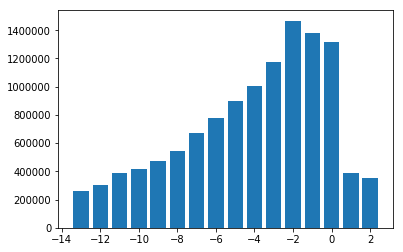

In [116]:
plt.bar(x=df_test_merg["month_lag"].value_counts().index, height=df_test_merg["month_lag"].value_counts())

(-2, 3)

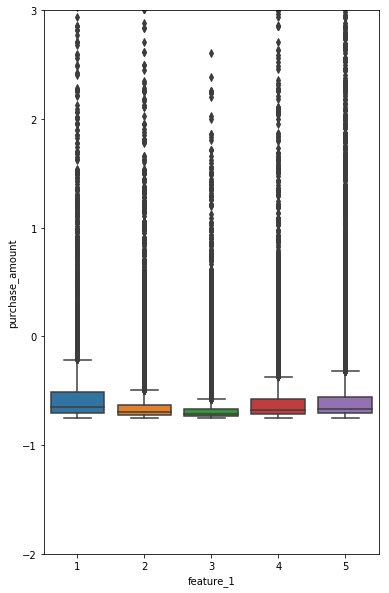

In [117]:
plt.figure(figsize=(6,10))
sns.boxplot(x='feature_1', y= "purchase_amount", data=df_test_merg.iloc[0:100000])
plt.ylim(-2, 3)

In [118]:
df_test_merg['installments'].unique()

array([  1,   4,   6,   2,   5,   3,  12,  10,  -1,   0,   8,   7,  11,
         9, 999])

In [119]:
df_test_merg.loc[(df_test_merg['installments']==-1),'installments'] = a
# -1 is missing value
df_test_merg.loc[(df_test_merg['installments']==999),'installments'] = a
# 999 is missing value
# filled in with average from training data, that training and testing filled with the same data

In [120]:
df_test_merg['installments'].unique()

array([ 1.        ,  4.        ,  6.        ,  2.        ,  5.        ,
        3.        , 12.        , 10.        ,  0.64790406,  0.        ,
        8.        ,  7.        , 11.        ,  9.        ])

In [121]:
df_test_mean = df_test_merg.groupby(by="card_id", sort=False).mean()

In [122]:
len(df_test_mean)

123623

In [123]:
len(df_test)

123623

In [124]:
df_test_mean.reset_index(inplace=True)

In [125]:
df_test_mean.head()

,card_id,feature_1,feature_2,feature_3,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
0,C_ID_0ab67a22ab,3.0,3.0,1.0,108.563380,2.056338,533.239437,-3.394366,-0.598745,1.000000,7.661972,25.225352
1,C_ID_130fd0cbdd,2.0,3.0,0.0,115.862069,1.080460,462.310345,-9.183908,-0.633117,3.987952,12.402299,28.287356
2,C_ID_b709037bc5,5.0,1.0,1.0,149.533333,3.996247,471.866667,-1.666667,0.313932,4.692308,6.533333,24.200000
3,C_ID_d27d835a9f,2.0,1.0,0.0,69.111111,1.952661,432.694444,-0.527778,-0.539844,1.114286,8.611111,25.000000
4,C_ID_2b5e3df5c2,5.0,1.0,1.0,268.672414,1.091792,455.094828,-5.844828,0.320727,3.844828,12.250000,25.215517


In [126]:
df_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [127]:
df_test[["ave_installments", "ave_month_lag", "ave_purchase_amount"]] = df_test_mean[["installments", "month_lag", "purchase_amount"]] 

In [128]:
df_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117
2,2017-08,C_ID_b709037bc5,5,1,1,3.996247,-1.666667,0.313932
3,2017-12,C_ID_d27d835a9f,2,1,0,1.952661,-0.527778,-0.539844
4,2015-12,C_ID_2b5e3df5c2,5,1,1,1.091792,-5.844828,0.320727


In [129]:
df_test_merg.loc[:, "for_count"] = 1

In [130]:
df_test_merg.head(2)
# To check if "for_count" column was added properly

,first_active_month,card_id,feature_1,feature_2,feature_3,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,for_count
0,2017-04,C_ID_0ab67a22ab,3,3,1,N,235,N,1.0,B,412,M_ID_85a5803161,-8,-0.697320,2017-04-27 14:17:27,1.0,12,18,1
1,2017-04,C_ID_0ab67a22ab,3,3,1,Y,235,N,1.0,B,278,M_ID_c873d839bd,-3,-0.716855,2017-09-21 22:11:57,1.0,12,37,1


In [131]:
df_test_sum = df_test_merg.groupby(by="card_id", sort=False).sum()

In [132]:
df_test_sum.reset_index(inplace=True)

In [133]:
df_test[["total_purchase_amount", "total_purchase_numbers"]] = df_test_sum[["purchase_amount","for_count"]]

In [134]:
df_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87
2,2017-08,C_ID_b709037bc5,5,1,1,3.996247,-1.666667,0.313932,4.708978,15
3,2017-12,C_ID_d27d835a9f,2,1,0,1.952661,-0.527778,-0.539844,-19.434389,36
4,2015-12,C_ID_2b5e3df5c2,5,1,1,1.091792,-5.844828,0.320727,37.204381,116


In [135]:
df_merch_cat_id_test = df_test_merg.groupby('card_id', sort=False)['merchant_category_id'].apply(list)

In [136]:
df_merch_cat_id_test = df_merch_cat_id_test.reset_index()

In [137]:
df_merch_cat_id_test.head()

,card_id,merchant_category_id
0,C_ID_0ab67a22ab,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29..."
1,C_ID_130fd0cbdd,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1..."
2,C_ID_b709037bc5,"[273, 422, 793, 769, 422, 529, 273, 87, 87, 87..."
3,C_ID_d27d835a9f,"[273, 560, 884, 774, 80, 63, 367, 683, 307, 42..."
4,C_ID_2b5e3df5c2,"[360, 437, 307, 222, 222, 437, 332, 307, 568, ..."


In [138]:
df_test["merchant_category_id"] = df_merch_cat_id_test["merchant_category_id"]

In [139]:
df_test.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1..."


In [140]:
df_test_merg['category_1'].unique()

array(['N', 'Y'], dtype=object)

In [141]:
df_test_merg['category_2'].unique()
# nan will be treated as a seperate class bucket

array([ 1., nan,  4.,  3.,  5.,  2.])

In [142]:
df_test_merg['category_2'].replace(to_replace=repl, value=None, inplace=True, limit=None, regex=False, method='pad')

In [143]:
df_test_merg['category_2'].unique()

array([1., 0., 4., 3., 5., 2.])

In [144]:
df_test_merg['category_3'].unique()
# nan will be treated as a seperate class bucket

array(['B', 'C', nan, 'A'], dtype=object)

In [145]:
df_test_merg['category_3'].replace(to_replace={np.nan: "D"}, value=None, inplace=True, limit=None, regex=False, method='pad')

In [146]:
df_test_merg['category_3'].unique()

array(['B', 'C', 'D', 'A'], dtype=object)

In [147]:
df_cat1_lst_test = df_test_merg.groupby('card_id', sort=False)['category_1'].apply(list)

In [148]:
df_cat1_lst_test = df_cat1_lst_test.reset_index()

In [149]:
df_cat1_lst_test.head(2)

,card_id,category_1
0,C_ID_0ab67a22ab,"[N, N, Y, N, N, N, N, Y, N, N, Y, Y, Y, N, N, ..."
1,C_ID_130fd0cbdd,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ..."


In [150]:
df_test["category_1"] = df_cat1_lst_test['category_1']

In [151]:
df_test.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29...","[N, N, Y, N, N, N, N, Y, N, N, Y, Y, Y, N, N, ..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ..."


In [152]:
df_cat2_lst_test = df_test_merg.groupby('card_id', sort=False)['category_2'].apply(list)

In [153]:
df_cat2_lst_test = df_cat2_lst_test.reset_index()

In [154]:
df_cat2_lst_test.head(2)

,card_id,category_2
0,C_ID_0ab67a22ab,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."
1,C_ID_130fd0cbdd,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."


In [155]:
df_test["category_2"] = df_cat2_lst_test['category_2']

In [156]:
df_test.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29...","[N, N, Y, N, N, N, N, Y, N, N, Y, Y, Y, N, N, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."


In [157]:
df_cat3_lst_test = df_test_merg.groupby('card_id', sort=False)['category_3'].apply(list)

In [158]:
df_cat3_lst_test = df_cat3_lst_test.reset_index()

In [159]:
df_cat3_lst_test.head(2)

,card_id,category_3
0,C_ID_0ab67a22ab,"[B, B, C, B, B, B, B, C, B, B, C, C, C, B, B, ..."
1,C_ID_130fd0cbdd,"[B, B, B, B, B, C, B, B, B, B, B, B, B, B, B, ..."


In [160]:
df_test["category_3"] = df_cat3_lst_test['category_3']

In [161]:
df_test.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29...","[N, N, Y, N, N, N, N, Y, N, N, Y, Y, Y, N, N, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[B, B, C, B, B, B, B, C, B, B, C, C, C, B, B, ..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[B, B, B, B, B, C, B, B, B, B, B, B, B, B, B, ..."


In [162]:
df_cityID_lst_test = df_test_merg.groupby('card_id', sort=False)['city_id'].apply(list)

In [163]:
df_cityID_lst_test = df_cityID_lst_test.reset_index()

In [164]:
df_cityID_lst_test.head(2)

,card_id,city_id
0,C_ID_0ab67a22ab,"[235, 235, -1, 235, 235, 79, 69, -1, 235, 235,..."
1,C_ID_130fd0cbdd,"[117, 117, 117, 117, 117, 117, 117, 117, 117, ..."


In [165]:
df_test["city_id"] = df_cityID_lst_test['city_id']

In [166]:
df_test.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29...","[N, N, Y, N, N, N, N, Y, N, N, Y, Y, Y, N, N, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[B, B, C, B, B, B, B, C, B, B, C, C, C, B, B, ...","[235, 235, -1, 235, 235, 79, 69, -1, 235, 235,..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[B, B, B, B, B, C, B, B, B, B, B, B, B, B, B, ...","[117, 117, 117, 117, 117, 117, 117, 117, 117, ..."


In [167]:
df_stateID_lst_test = df_test_merg.groupby('card_id', sort=False)['state_id'].apply(list)

In [168]:
df_stateID_lst_test = df_stateID_lst_test.reset_index()

In [169]:
df_stateID_lst_test.head(2)

,card_id,state_id
0,C_ID_0ab67a22ab,"[12, 12, -1, 12, 12, 12, 9, -1, 12, 12, -1, -1..."
1,C_ID_130fd0cbdd,"[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1..."


In [170]:
df_test["state_id"] = df_stateID_lst_test['state_id']

In [171]:
df_test.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29...","[N, N, Y, N, N, N, N, Y, N, N, Y, Y, Y, N, N, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[B, B, C, B, B, B, B, C, B, B, C, C, C, B, B, ...","[235, 235, -1, 235, 235, 79, 69, -1, 235, 235,...","[12, 12, -1, 12, 12, 12, 9, -1, 12, 12, -1, -1..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[B, B, B, B, B, C, B, B, B, B, B, B, B, B, B, ...","[117, 117, 117, 117, 117, 117, 117, 117, 117, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1..."


In [172]:
df_subsectorID_lst_test = df_test_merg.groupby('card_id', sort=False)['subsector_id'].apply(list)

In [173]:
df_subsectorID_lst_test =df_subsectorID_lst_test.reset_index()

In [174]:
df_subsectorID_lst_test.head(2)

,card_id,subsector_id
0,C_ID_0ab67a22ab,"[18, 37, 29, 37, 37, 19, 29, 29, 37, 10, 29, 7..."
1,C_ID_130fd0cbdd,"[33, 33, 33, 33, 41, 27, 16, 33, 34, 41, 33, 1..."


In [175]:
df_test["subsector_id"] = df_subsectorID_lst_test['subsector_id']

In [176]:
df_test.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id,subsector_id
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29...","[N, N, Y, N, N, N, N, Y, N, N, Y, Y, Y, N, N, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[B, B, C, B, B, B, B, C, B, B, C, C, C, B, B, ...","[235, 235, -1, 235, 235, 79, 69, -1, 235, 235,...","[12, 12, -1, 12, 12, 12, 9, -1, 12, 12, -1, -1...","[18, 37, 29, 37, 37, 19, 29, 29, 37, 10, 29, 7..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[B, B, B, B, B, C, B, B, B, B, B, B, B, B, B, ...","[117, 117, 117, 117, 117, 117, 117, 117, 117, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[33, 33, 33, 33, 41, 27, 16, 33, 34, 41, 33, 1..."


In [177]:
df_monthLag_lst_test = df_test_merg.groupby('card_id', sort=False)['month_lag'].apply(list)

In [178]:
df_monthLag_lst_test = df_monthLag_lst_test.reset_index()

In [179]:
df_monthLag_lst_test.head(2)

,card_id,month_lag
0,C_ID_0ab67a22ab,"[-8, -3, -6, -8, -2, 0, -5, -6, -2, -6, -8, -8..."
1,C_ID_130fd0cbdd,"[-10, -13, -10, -11, -9, -10, -9, -10, -11, -1..."


In [180]:
df_test["month_lag"] = df_monthLag_lst_test['month_lag']

In [181]:
df_test.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id,subsector_id,month_lag
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29...","[N, N, Y, N, N, N, N, Y, N, N, Y, Y, Y, N, N, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[B, B, C, B, B, B, B, C, B, B, C, C, C, B, B, ...","[235, 235, -1, 235, 235, 79, 69, -1, 235, 235,...","[12, 12, -1, 12, 12, 12, 9, -1, 12, 12, -1, -1...","[18, 37, 29, 37, 37, 19, 29, 29, 37, 10, 29, 7...","[-8, -3, -6, -8, -2, 0, -5, -6, -2, -6, -8, -8..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[B, B, B, B, B, C, B, B, B, B, B, B, B, B, B, ...","[117, 117, 117, 117, 117, 117, 117, 117, 117, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[33, 33, 33, 33, 41, 27, 16, 33, 34, 41, 33, 1...","[-10, -13, -10, -11, -9, -10, -9, -10, -11, -1..."


In [182]:
df_test.tail(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id,subsector_id,month_lag
123621,2017-06,C_ID_6c46fc5a9d,2,1,0,1.886703,-1.867647,-0.630934,-42.903516,68,"[222, 879, 367, 222, 307, 705, 705, 307, 574, ...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[C, C, B, C, B, B, C, B, C, C, B, C, C, C, C, ...","[302, 69, 302, 302, 25, 302, 302, 302, 25, 302...","[7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[21, 29, 16, 21, 19, 33, 33, 19, 22, 18, 16, 1...","[-3, -4, -1, -2, -4, -1, -3, -2, -3, -1, -2, -..."
123622,2016-10,C_ID_87e7979a5f,5,1,1,1.619719,-6.790698,-0.600306,-25.813173,43,"[307, 690, 307, 307, 842, 842, 879, 834, 367, ...","[N, N, N, N, N, N, N, Y, N, N, N, N, N, N, N, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[B, C, B, B, B, B, B, C, B, B, B, C, B, B, B, ...","[331, 331, 331, 331, 331, 331, 69, -1, 331, 33...","[16, 16, 16, 16, 16, 16, 9, -1, 16, 16, 16, 16...","[19, 1, 19, 19, 37, 37, 29, 27, 16, 33, 19, 20...","[-7, -9, -5, -13, -11, -9, -3, -3, 0, -6, -12,..."


In [183]:
df_test.to_csv("test_data_post_processing2", index=False)

In [184]:
df_tt = pd.read_csv("test_data_post_processing2")
# reopen to check if it's saved properly

In [185]:
df_tt.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,ave_installments,ave_month_lag,ave_purchase_amount,total_purchase_amount,total_purchase_numbers,merchant_category_id,category_1,category_2,category_3,city_id,state_id,subsector_id,month_lag
0,2017-04,C_ID_0ab67a22ab,3,3,1,2.056338,-3.394366,-0.598745,-42.510888,71,"[412, 278, 879, 80, 278, 307, 879, 879, 80, 29...","['N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', ...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","['B', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', ...","[235, 235, -1, 235, 235, 79, 69, -1, 235, 235,...","[12, 12, -1, 12, 12, 12, 9, -1, 12, 12, -1, -1...","[18, 37, 29, 37, 37, 19, 29, 29, 37, 10, 29, 7...","[-8, -3, -6, -8, -2, 0, -5, -6, -2, -6, -8, -8..."
1,2017-01,C_ID_130fd0cbdd,2,3,0,1.080460,-9.183908,-0.633117,-55.081212,87,"[705, 705, 705, 705, 130, 87, 367, 705, 195, 1...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","['B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', ...","[117, 117, 117, 117, 117, 117, 117, 117, 117, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[33, 33, 33, 33, 41, 27, 16, 33, 34, 41, 33, 1...","[-10, -13, -10, -11, -9, -10, -9, -10, -11, -1..."
